<h2>Chargeons le jeu de données

In [9]:
import pandas as pd 
raw_data = pd.read_csv('TP_2_datset_mushrooms.csv')

In [10]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Première chose, encoder nos données en données chiffres plutôt que des lettres

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])

raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


On sépare notre jeu de donnée de manière classique entre données d'entraînement et données de test.

In [12]:
from sklearn.model_selection import train_test_split

# On récupère les features d'un côté...
X = raw_data.iloc[:,1:23]

# et les labels de l'autre
y = raw_data.iloc[:,0] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

<h2>Appliquez la régression logistique

Pour rappel, la régression logistique peut avoir un paramètre de régularisation de la même manière que la régression linéaire, de norme 1 ou 2.

Observons dans un premier temps la performance de la régression logistique classique

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_train,y_train)

# On récupère la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9847465990618947


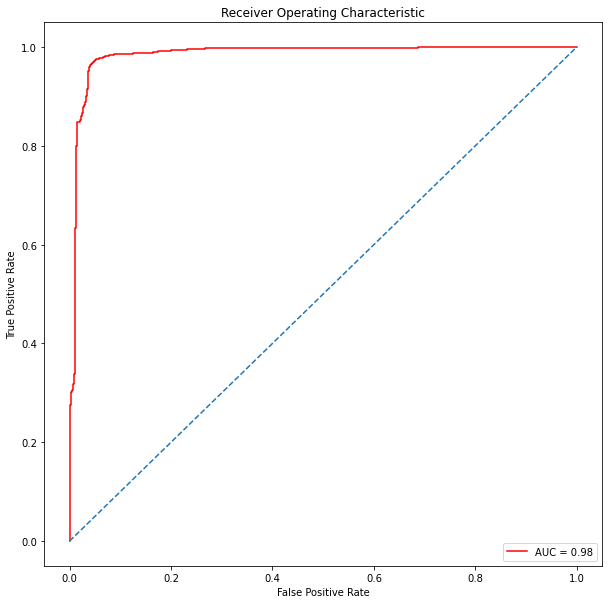

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

On peut maintenant essayer de tuner cette régression logistique en testant plusieurs paramètres, à l'aide de la fonctionGridSearchCV qui effectue aussi en passant une validation croisée.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'liblinear', max_iter=100)
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

Comme pour la régression linéaire, la différences entre un paramètre de régularisation de norme 1 ou 2 est que celui de norme 1 effectue en même temps une sélection des variables (parmi celles qui sont corrélées) en mettant leur poids à zéro.

On peut évaluer notre modèle de la même manière que pour la régression logistique classique, avec une AUC :

In [19]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9909904240187042


<h2>Appliquez une SVM Linéaire

In [30]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

svm = LinearSVC(max_iter=1000000)

params = { 'C': np.logspace(-3, 3, 10) }

gs_svm = GridSearchCV(svm, params, cv=10,)
gs_svm.fit(X_train, y_train)

print(gs_svm.best_params_)

/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/efkanturedi/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

KeyboardInterrupt: 

On peut maintenant passer à l'évaluation


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

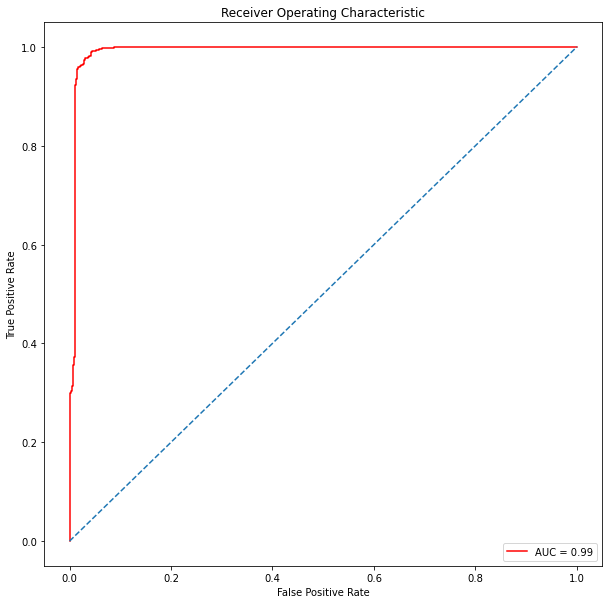

In [29]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(roc_auc, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()